### 1) Import the datasets and libraries

In [1]:
# Data analytics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categories into numbers
from sklearn.preprocessing import OrdinalEncoder
# Normalize Data so original input ZIP Code is not weighted more that a smaller value column, for example, Age.


# Split data into train and test sets
from sklearn.model_selection import train_test_split

# Model performance
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.dtypes 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
df.describe()
# There is a weird value in experiecne. Min xp is -3 years.
# It seems odd that the minimum income is $8,000, maybe it is an anomoly?
# Min ZIP Code is a 4 digit number
# This sample set is biased and describes only candidates which completed higher education. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.shape

(5000, 14)

In [6]:
df.isnull().sum()
# No missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Values with negative expereience 
df[df["Experience"] < 0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [8]:
# Values with low income
df[df["Income"] == 8].sort_values("Income")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
50,51,32,8,8,92093,4,0.70,2,0,0,1,0,1,0
4416,4417,49,25,8,94720,1,0.30,1,97,0,0,0,0,0
4223,4224,53,26,8,94709,1,0.50,2,0,0,0,0,0,1
4094,4095,53,23,8,95616,4,0.40,3,0,0,1,0,1,0
3718,3719,45,19,8,92833,2,0.10,3,0,0,0,0,0,1
2905,2906,64,40,8,94110,2,0.30,3,0,0,0,0,1,0
2695,2696,40,15,8,94960,2,0.10,2,0,0,0,0,0,0
2591,2592,31,7,8,95131,4,0.70,2,0,0,0,0,0,0
2509,2510,36,11,8,93401,4,0.20,3,81,0,0,0,0,1
2354,2355,35,9,8,94043,1,0.40,2,0,0,0,0,1,0


In [9]:
# 4 digit ZIP Code
df[df["ZIP Code"] < 10000]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


##### Incorrect imputations
At first analysis, there appears to be imputations within the "ZIP Code", "Experience" and "Income" columns. There are customers with 4 digit "ZIP Codes" and other customers with "Experience" listed at below "0" years. Additionally, there are customers with "Income" listed as "$8,000" which is odd but possible. In a real world setting, it would be wise to reach out to Thera to confirm these imputations listed.

For now, 4-digit ZIP Codes will be removed, Income values of "$8,000" will be kept as is, and negative years of experience will be removed.

### 2) EDA

In [10]:
df_cleaned = df.drop(df[df["Experience"] < 0].index).drop(df[df["ZIP Code"] < 10000].index)
#df.drop(df[df['c3'] == False].index)
df_cleaned.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,2501.696584,45.556095,20.330099,73.825147,93168.521932,2.391146,1.936196,1.878714,56.645846,0.097029,0.104306,0.061047,0.596927,0.293916
std,1443.109812,11.321615,11.312922,46.111141,1761.253907,1.148333,1.747768,0.839679,101.835994,0.296026,0.305688,0.239441,0.490565,0.455600
min,1.000000,24.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1255.500000,36.000000,10.500000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2498.000000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.500000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for i in df_cleaned.columns:
    print("The",i,"column has",df[i].nunique(),"unique values.")

The ID column has 5000 unique values.
The Age column has 45 unique values.
The Experience column has 47 unique values.
The Income column has 162 unique values.
The ZIP Code column has 467 unique values.
The Family column has 4 unique values.
The CCAvg column has 108 unique values.
The Education column has 3 unique values.
The Mortgage column has 347 unique values.
The Personal Loan column has 2 unique values.
The Securities Account column has 2 unique values.
The CD Account column has 2 unique values.
The Online column has 2 unique values.
The CreditCard column has 2 unique values.


In [12]:
pd.DataFrame(df_cleaned[["Mortgage"]].value_counts(),columns=["Count"])

,Count
Mortgage,
0,3421
98,17
119,16
103,16
83,16
...,...
344,1
343,1
173,1


In [13]:
pd.DataFrame(df_cleaned[["CCAvg"]].value_counts(),columns=["Count"]).sort_values("CCAvg")

,Count
CCAvg,
0.0,106
0.1,183
0.2,203
0.3,238
0.4,177
...,...
8.8,9
8.9,1
9.0,2


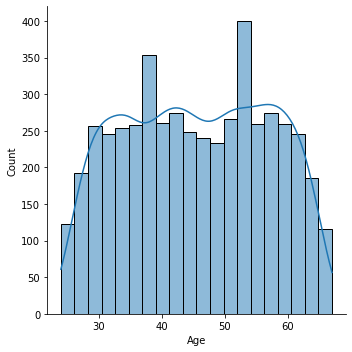

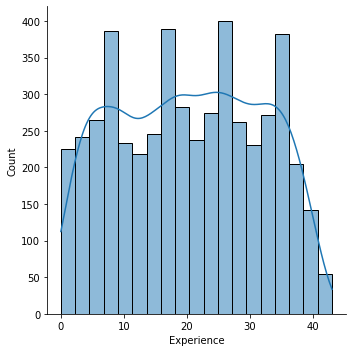

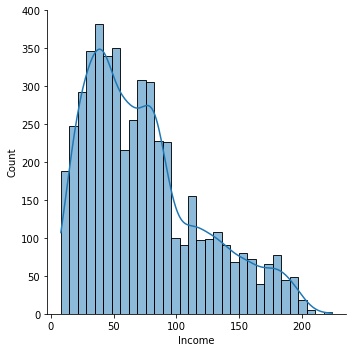

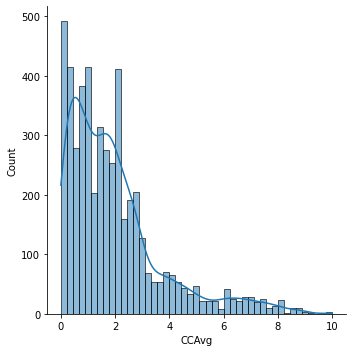

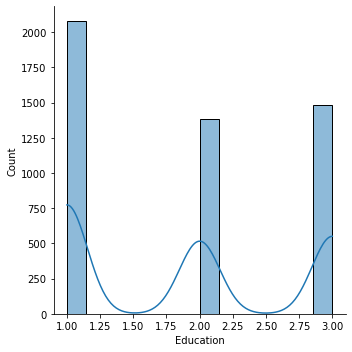

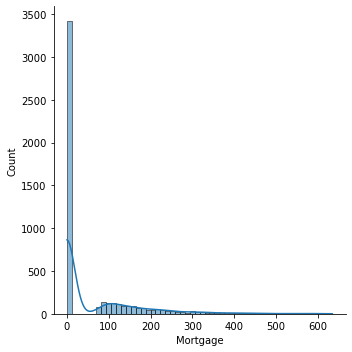

In [19]:
for i in df_cleaned[["Age","Experience","Income","CCAvg",'Education',"Mortgage"]].columns:
    sns.displot(df_cleaned[i], kde=True)
# While the Education column is categorical in nature, 
# this column is included in this visualization because it easier to 
# compare education characterstics accross the sample provided by Thera.

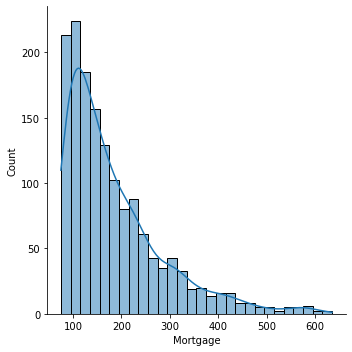

In [16]:
# Below is the distribution for Mortgages greater than 0
sns.displot(df_cleaned[df_cleaned["Mortgage"]>0]["Mortgage"], kde=True);

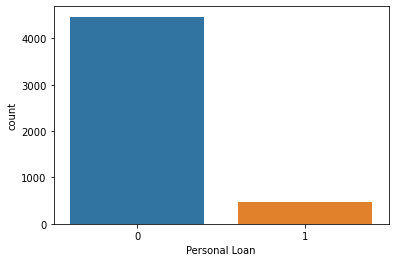

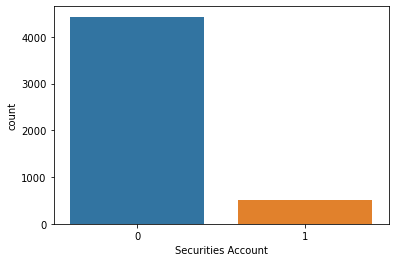

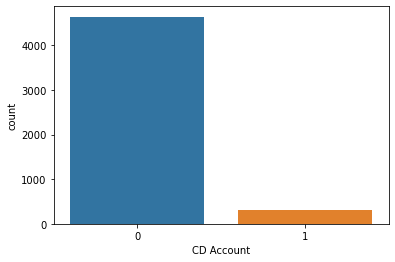

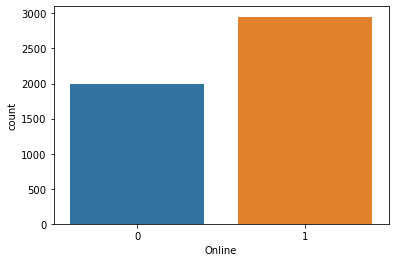

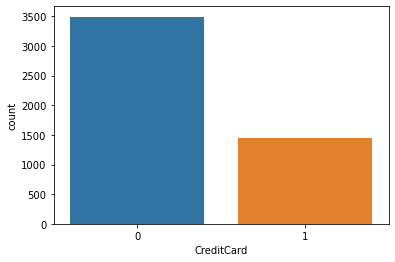

In [17]:
for i in df_cleaned[["Personal Loan","Securities Account",'CD Account',"Online","CreditCard"]].columns:
    sns.countplot(x = df_cleaned[i], data = df_cleaned)
    plt.show()

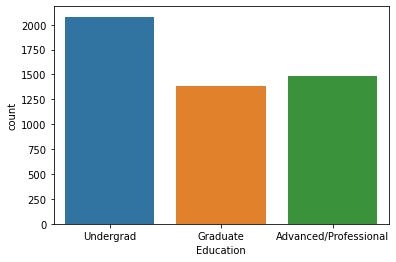

In [18]:
sns.countplot(x = df_cleaned["Education"].replace({1: "Undergrad", 2: "Graduate", 3: "Advanced/Professional"}));

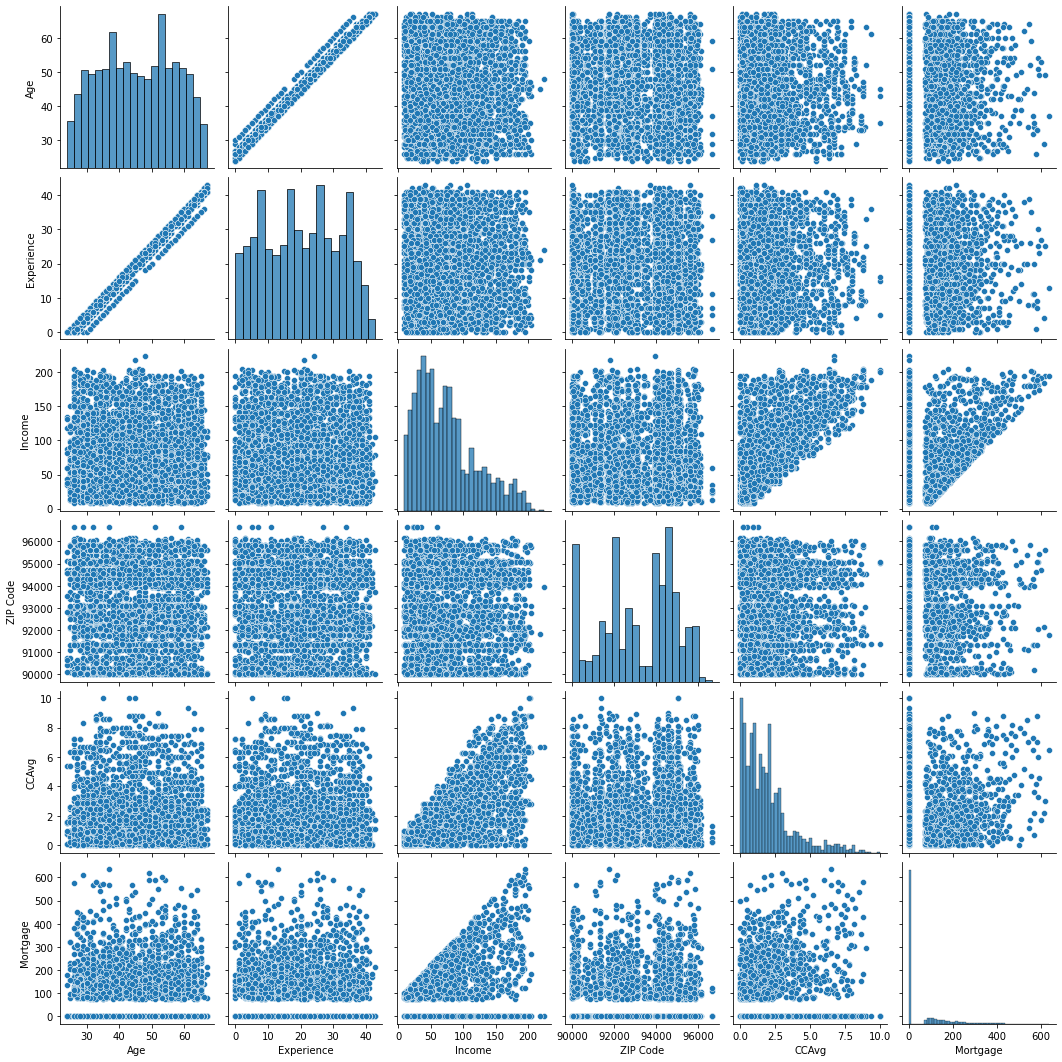

In [19]:
# In the CCAvg and Mortgage v Income plot, there is a line which describes the bank's lending policy. 
# For example, if you have an income of 100k, you cannot have a mortgage > $400k or spend >$6k a month on your CC with Thera.
sns.pairplot(df_cleaned[["Age", "Experience", "Income", "ZIP Code", "CCAvg", "Mortgage"]]);

In [20]:
# This df has negative experience values and 4 digit zip codes removed.
df_cleaned

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [21]:
# encode ZIP Code categories to numbers
enc = OrdinalEncoder()

df_encode = df_cleaned.copy()
df_encode['ZIP Code'] = df_encode['ZIP Code'].astype(str)
df_encode["ZIP Code"] = enc.fit_transform(df_encode[["ZIP Code"]])

df_encode

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,82.0,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,33.0,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,366.0,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,297.0,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,95.0,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,208.0,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,140.0,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,234.0,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,14.0,3,0.5,2,0,0,0,0,1,0


In [22]:
# Normalize so the model weights are not biased due to oringial input data scale.

normalized_df=(df_encode-df_encode.min())/(df_encode.max()-df_encode.min())
normalized_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,0.500239,0.501305,0.472793,0.304746,0.513185,0.463715,0.193620,0.439357,0.089206,0.097029,0.104306,0.061047,0.596927,0.293916
std,0.288680,0.263293,0.263091,0.213478,0.281572,0.382778,0.174777,0.419839,0.160372,0.296026,0.305688,0.239441,0.490565,0.455600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250950,0.279070,0.244186,0.143519,0.279570,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.499500,0.511628,0.465116,0.259259,0.544086,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.750050,0.720930,0.697674,0.416667,0.754839,0.666667,0.260000,1.000000,0.159055,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3) Split the data into training and test set in the ratio of 70:30 respectively 

In [23]:
X = normalized_df.drop(columns = ['ID', 'Personal Loan'],axis=1)     # Predictor feature columns
Y = normalized_df['Personal Loan']   # Predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2758,0.883721,0.837209,0.125000,0.688172,0.333333,0.07,1.0,0.000000,1.0,0.0,0.0,1.0
370,0.279070,0.279070,0.078704,0.322581,1.000000,0.10,0.0,0.231496,0.0,0.0,0.0,0.0
2338,0.418605,0.418605,0.564815,0.761290,0.333333,0.75,0.0,0.000000,0.0,0.0,0.0,1.0
3341,0.255814,0.209302,0.115741,0.182796,0.333333,0.03,0.0,0.000000,1.0,0.0,1.0,0.0
3656,0.255814,0.186047,0.101852,0.830108,1.000000,0.10,0.5,0.000000,1.0,0.0,0.0,0.0


In [24]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_cleaned.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_cleaned.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [25]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_cleaned.loc[df_cleaned['Personal Loan'] == 1]), (len(df_cleaned.loc[df_cleaned['Personal Loan'] == 1])/len(df_cleaned.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_cleaned.loc[df_cleaned['Personal Loan'] == 0]), (len(df_cleaned.loc[df_cleaned['Personal Loan'] == 0])/len(df_cleaned.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.70%)
Original Personal Loan False Values   : 4467 (90.30%)

Training Personal Loan True Values    : 355 (10.25%)
Training Personal Loan False Values   : 3107 (89.75%)

Test Personal Loan True Values        : 125 (8.42%)
Test Personal Loan False Values       : 1360 (91.58%)



### 4) Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 

In [26]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

In [27]:
model_score = model.score(x_test, y_test)
print("The model has a score of:", model_score.round(3))

The model has a score of: 0.958


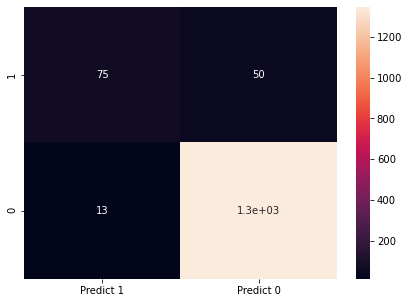

In [28]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix

True Positives (TP): we correctly predicted that they bought a personal loan 75

True Negatives (TN): we correctly predicted that they did not buy a personal loan 1313

False Positives (FP): we incorrectly predicted that they bought a personal loan (a "Type I error") 13 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they did not buy a personal loan (a "Type II error") 50 Falsely predict negative Type II error

In [29]:
print("The Accuracy Score is:",metrics.accuracy_score(y_test, y_predict).round(3)) # How often is the classifier correct
print("The Recall Score is:",metrics.recall_score(y_test, y_predict).round(2)) # When it's actually yes, how often does it predict yes?
print("The Precision Score is:",metrics.precision_score(y_test, y_predict).round(2)) # When it predicts yes, how often is it correct?
print("The F1 Score is:",metrics.f1_score(y_test, y_predict).round(2))
print("The ROC AUC Score is:",metrics.roc_auc_score(y_test, y_predict).round(2))

The Accuracy Score is: 0.958
The Recall Score is: 0.6
The Precision Score is: 0.85
The F1 Score is: 0.7
The ROC AUC Score is: 0.8


### 5) Find out coefficients of all the attributes and show all the rows where the predicted class is not equal to the observed class for the Test Data.

In [30]:
coef_df = pd.DataFrame(np.append(x_train.columns,"Intercept"), columns = ["Variables"])
coef_df["Coeficients"] = np.append(model.coef_,model.intercept_)
coef_df

# The income variable has the strongest positive correlation to accepting a personal loan in this model.
# Wheter a condidate has a Credit Card has the strongest negative correlation to accepting a personal loan in this model.
# The zip code has the weakest correlation to accepting a personal loan. Thera's lending practice is agnostic to ZIP Codes.

,Variables,Coeficients
0,Age,-0.409742
1,Experience,0.259074
2,Income,7.985966
3,ZIP Code,-0.109036
4,Family,1.331439
5,CCAvg,1.226427
6,Education,2.283176
7,Mortgage,0.409100
8,Securities Account,-0.847047
9,CD Account,3.292518


In [31]:
# DF to compare observed and predicted values. 
model_err = pd.DataFrame(y_test).rename(columns = {"Personal Loan": "Obersved"})
model_err["Predicted"] = y_predict
model_err

,Obersved,Predicted
2377,0.0,0.0
3641,0.0,0.0
4140,0.0,0.0
3479,0.0,0.0
250,0.0,0.0
...,...,...
3275,0.0,0.0
4436,0.0,0.0
2694,0.0,0.0
590,0.0,0.0


In [32]:
# Showing the values which are not the same.
model_err[model_err["Obersved"]!=model_err["Predicted"]].sort_index()

,Obersved,Predicted
57,1.0,0.0
316,1.0,0.0
317,1.0,0.0
422,0.0,1.0
442,1.0,0.0
...,...,...
4659,0.0,1.0
4671,0.0,1.0
4702,1.0,0.0
4763,1.0,0.0


In [33]:
# Saving the index values of the incorrectly predicted candidates. 
index_values = x_test[model_err["Obersved"]!=model_err["Predicted"]].sort_index().index.values
index_values

array([  57,  316,  317,  422,  442,  785,  896,  927,  975, 1007, 1062,
       1097, 1143, 1177, 1195, 1373, 1432, 1478, 1518, 1570, 1579, 1604,
       1768, 1870, 1913, 1998, 2021, 2158, 2285, 2304, 2391, 2536, 2544,
       2623, 2791, 2874, 2885, 3271, 3322, 3326, 3343, 3347, 3541, 3571,
       3608, 3804, 3896, 3959, 4302, 4331, 4354, 4377, 4439, 4532, 4583,
       4593, 4604, 4606, 4659, 4671, 4702, 4763, 4846], dtype=int64)

In [34]:
# Showing all the rows where the predicted class is not equal to the observed class.
df_cleaned.iloc[index_values,1:]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
57,56,31,131,95616,2,1.20,3,0,1,0,0,0,0
319,65,39,20,90034,3,0.70,2,0,0,0,0,0,1
320,60,34,64,90266,1,0.80,2,248,0,0,0,0,0
426,42,18,75,92182,3,2.33,1,0,0,0,0,0,1
446,47,23,22,93108,1,1.00,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,65,40,59,94022,3,2.40,1,0,0,0,0,0,0
4723,39,15,125,90250,1,3.50,1,0,0,0,0,1,1
4754,57,33,93,94025,2,1.60,1,161,0,0,0,0,0
4815,58,32,99,92697,2,1.40,1,0,0,0,0,0,1


### 6) Give conclusion related to the Business understanding of your model.

- CCAvg and Mortgage lending limits exist with respect to Income.
- Logistic Regression Model Accurate 
    - The Accuracy Score is: 0.958
    - The Recall Score is: 0.6
    - The Precision Score is: 0.85
    - The F1 Score is: 0.7
    - The ROC AUC Score is: 0.8
- Running candidate data into this model should increase the conversion rate of the campaign by 48.54%, from 9% to 57.54%. (model accuracy* recall)
- Running candidate data into this model should accuractly predict a new persoanl loan customer 81.61% of the time. (model accuracy * precision) 
- Leveraging this model can assist with deciding which customers to not waste time and resources on to convert them into a personal loan customer. 
- Using this model, its probabilities, the lifetime value of a personal loan customer, and the cost of acquiring a new personal loan customer can assist in forecasting department profitability.